In [2]:
import numpy as np
import pandas as pd
import pprint, pickle


In [3]:

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

2022-05-08 12:06:49.679925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 12:06:49.680032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
names=['amani','gayanjali','harshi','hasitha','isurika','gihan','jayasanka','chathura','geemanthi','damith']

data=[]
for i in names:
    file_T_L = open('feature_vector_L/FV_side_{}.pkl'.format(i), 'rb')
    values_T_L = pickle.load(file_T_L)
    file_T_L.close()
    
    file_T_R = open('feature_vector_R/FV_side_{}.pkl'.format(i), 'rb')
    values_T_R = pickle.load(file_T_R)
    file_T_R.close()
    
    file_T_F = open('feature_vector_F/FV_front_{}.pkl'.format(i), 'rb')
    values_T_F = pickle.load(file_T_F)
    file_T_F.close()
    
    file_S_L = open('feature_vector_L/feature_vector_Static_left_{}.pkl'.format(i), 'rb')
    values_S_L = pickle.load(file_S_L)
    file_S_L.close()
    
    file_S_R = open('feature_vector_R/feature_vector_Static_right_{}.pkl'.format(i), 'rb')
    values_S_R = pickle.load(file_S_R)
    file_S_R.close()
    
    file_S_F = open('feature_vector_F/feature_vector_Static_front_{}.pkl'.format(i), 'rb')
    values_S_F = pickle.load(file_S_F)
    file_S_F.close()
    
    file_D_L = open('feature_vector_L/feature_vector_Dynamic_left_{}.pkl'.format(i), 'rb')
    values_D_L = pickle.load(file_D_L)
    file_D_L.close()
    
    file_D_R = open('feature_vector_R/feature_vector_Dynamic_right_{}.pkl'.format(i), 'rb')
    values_D_R = pickle.load(file_D_R)
    file_D_R.close()
    
    file_D_F = open('feature_vector_F/feature_vector_Dynamic_front_{}.pkl'.format(i), 'rb')
    values_D_F = pickle.load(file_D_F)
    file_D_F.close()
    
    values=list(values_T_R)+list(values_T_L)+list(values_T_F)+list(values_S_R)+list(values_S_L)+list(values_S_F)+list(values_D_R)+list(values_D_L)+list(values_D_F)
    print(len(values))
    #values=sameSize(values)
    data.append(np.array(values))




109
109
109
109
109
109
109


/tmp/ipykernel_4685/4132913939.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data.append(np.array(values))


109
109
109


In [5]:
def sameSize(data):
    for j in range(len(data)):
        maxLen = max(map(lambda x:len(x), data[j]))
        s=[]
        for i in data[j]:
            d=maxLen//len(i)
            r=maxLen%len(i)
            arr=list(i)*d+list(i)[:r]
            s.append(arr)
        s=np.array(s)
        s=s.T
        data[j]=s
    return data
        

In [6]:
data=sameSize(data)

In [7]:
def instance(data_arr):   
    final_data=[]
    for i in range(len(data_arr)):
        s=np.full(shape=data_arr[i].shape[0],fill_value=i)
        s=s.reshape(-1,1)
        array = np.append(data_arr[i],s, axis = 1)
        if final_data==[]:
            final_data=array
        else:
            final_data=np.append(final_data,array,axis=0)
    print(final_data.shape)
    return final_data
    

In [8]:
final_data=instance(data)

(2383, 110)


/tmp/ipykernel_4685/4090918646.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if final_data==[]:


In [9]:
df=pd.DataFrame(final_data)
df

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,1.910101,2.194645,4.104746,4.141696,1.0,1.0,4.490224,NaN,1.0,1.0,...,3.985626,3.723448,13.875181,21.456224,22.839523,1.291274,1.270763,0.735025,0.208292,0.0
1,1.939328,2.014089,3.953417,3.821873,1.0,1.0,4.490224,NaN,1.0,1.0,...,4.058567,3.878008,14.353571,31.488149,27.539862,1.341496,1.301892,1.575200,0.359424,0.0
2,2.146059,1.667018,4.176695,3.751658,1.0,1.0,4.490224,NaN,1.0,1.0,...,3.284778,3.262181,15.667369,31.488149,16.469444,1.310717,1.194482,4.148641,0.855073,0.0
3,1.778163,2.093830,3.802059,3.857567,1.0,1.0,4.490224,NaN,1.0,1.0,...,4.052584,4.580933,17.154193,31.488149,16.469444,1.257338,1.273897,2.181473,0.512257,0.0
4,2.173949,2.010121,4.150085,4.141011,1.0,1.0,4.490224,NaN,1.0,1.0,...,3.997017,3.107827,13.766911,19.750706,16.469444,1.313877,1.263617,1.281938,0.353982,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,1.957404,1.944912,3.912526,3.902316,1.0,1.0,4.129805,0.800350,1.0,1.0,...,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829,9.0
2379,1.957404,1.944912,3.800237,3.201686,1.0,1.0,4.129805,0.800350,1.0,1.0,...,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829,9.0
2380,1.957404,1.944912,3.129504,2.609333,1.0,1.0,4.129805,0.800350,1.0,1.0,...,5.134563,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829,9.0
2381,2.229754,1.999542,4.229295,4.022983,1.0,1.0,4.129805,0.800350,1.0,1.0,...,2.512086,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829,9.0


In [10]:
df_input=df.drop([109], axis=1)
df_input

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.910101,2.194645,4.104746,4.141696,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,3.985626,3.723448,13.875181,21.456224,22.839523,1.291274,1.270763,0.735025,0.208292
1,1.939328,2.014089,3.953417,3.821873,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,4.058567,3.878008,14.353571,31.488149,27.539862,1.341496,1.301892,1.575200,0.359424
2,2.146059,1.667018,4.176695,3.751658,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,3.284778,3.262181,15.667369,31.488149,16.469444,1.310717,1.194482,4.148641,0.855073
3,1.778163,2.093830,3.802059,3.857567,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,4.052584,4.580933,17.154193,31.488149,16.469444,1.257338,1.273897,2.181473,0.512257
4,2.173949,2.010121,4.150085,4.141011,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,3.997017,3.107827,13.766911,19.750706,16.469444,1.313877,1.263617,1.281938,0.353982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,1.957404,1.944912,3.912526,3.902316,1.0,1.0,4.129805,0.800350,1.0,1.0,...,22.102165,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2379,1.957404,1.944912,3.800237,3.201686,1.0,1.0,4.129805,0.800350,1.0,1.0,...,12.461853,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2380,1.957404,1.944912,3.129504,2.609333,1.0,1.0,4.129805,0.800350,1.0,1.0,...,22.573778,5.134563,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2381,2.229754,1.999542,4.229295,4.022983,1.0,1.0,4.129805,0.800350,1.0,1.0,...,12.365214,2.512086,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829


In [11]:
df_input.mean()

0       2.198160
1       1.935772
2       4.468450
3       4.237892
4       1.000000
         ...    
104    24.011891
105     1.247251
106     1.229177
107     1.740935
108     0.532826
Length: 109, dtype: float64

In [12]:

df_input.fillna(method='ffill')

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.910101,2.194645,4.104746,4.141696,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,3.985626,3.723448,13.875181,21.456224,22.839523,1.291274,1.270763,0.735025,0.208292
1,1.939328,2.014089,3.953417,3.821873,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,4.058567,3.878008,14.353571,31.488149,27.539862,1.341496,1.301892,1.575200,0.359424
2,2.146059,1.667018,4.176695,3.751658,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,3.284778,3.262181,15.667369,31.488149,16.469444,1.310717,1.194482,4.148641,0.855073
3,1.778163,2.093830,3.802059,3.857567,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,4.052584,4.580933,17.154193,31.488149,16.469444,1.257338,1.273897,2.181473,0.512257
4,2.173949,2.010121,4.150085,4.141011,1.0,1.0,4.490224,NaN,1.0,1.0,...,11.325058,3.997017,3.107827,13.766911,19.750706,16.469444,1.313877,1.263617,1.281938,0.353982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,1.957404,1.944912,3.912526,3.902316,1.0,1.0,4.129805,0.800350,1.0,1.0,...,22.102165,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2379,1.957404,1.944912,3.800237,3.201686,1.0,1.0,4.129805,0.800350,1.0,1.0,...,12.461853,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2380,1.957404,1.944912,3.129504,2.609333,1.0,1.0,4.129805,0.800350,1.0,1.0,...,22.573778,5.134563,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2381,2.229754,1.999542,4.229295,4.022983,1.0,1.0,4.129805,0.800350,1.0,1.0,...,12.365214,2.512086,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829


In [13]:
m=df_input.mean()

In [14]:
values={}
for i in range(109):
    values[i]=m[i]
values

{0: 2.1981595996615986,
 1: 1.9357718847822956,
 2: 4.4684498385374525,
 3: 4.237891829795435,
 4: 1.0,
 5: 1.0,
 6: 1.791077891209176,
 7: 1.6674450053694498,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 2.240098921134432,
 13: 2.0107458540361822,
 14: 4.1748169551880725,
 15: 4.053687525847188,
 16: 1.0,
 17: 1.0,
 18: 1.9304895221841436,
 19: 1.8574341417029199,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.884210167130591,
 25: 4.279581332668499,
 26: 3.6763558496065354,
 27: 3.7284106096759464,
 28: 1.5618370602821037,
 29: 47.48882870512045,
 30: 55.74143515191069,
 31: 41.88958395340757,
 32: 50.81733700309651,
 33: 26.85197267109936,
 34: 32.13254869991028,
 35: 71.41618078154741,
 36: 71.94360688806215,
 37: 71.55539326626611,
 38: 69.92317918180022,
 39: 21.891194382062007,
 40: 21.647585429059674,
 41: 1.5701519692964214,
 42: 56.8725329401507,
 43: 28.490550729381273,
 44: 49.11475318357997,
 45: 25.244508687795573,
 46: 30.250652779773834,
 47: 15.401691495954063,
 48: 72.8

In [15]:
df_input=df_input.fillna(value=values)
df_input

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,1.910101,2.194645,4.104746,4.141696,1.0,1.0,4.490224,1.667445,1.0,1.0,...,11.325058,3.985626,3.723448,13.875181,21.456224,22.839523,1.291274,1.270763,0.735025,0.208292
1,1.939328,2.014089,3.953417,3.821873,1.0,1.0,4.490224,1.667445,1.0,1.0,...,11.325058,4.058567,3.878008,14.353571,31.488149,27.539862,1.341496,1.301892,1.575200,0.359424
2,2.146059,1.667018,4.176695,3.751658,1.0,1.0,4.490224,1.667445,1.0,1.0,...,11.325058,3.284778,3.262181,15.667369,31.488149,16.469444,1.310717,1.194482,4.148641,0.855073
3,1.778163,2.093830,3.802059,3.857567,1.0,1.0,4.490224,1.667445,1.0,1.0,...,11.325058,4.052584,4.580933,17.154193,31.488149,16.469444,1.257338,1.273897,2.181473,0.512257
4,2.173949,2.010121,4.150085,4.141011,1.0,1.0,4.490224,1.667445,1.0,1.0,...,11.325058,3.997017,3.107827,13.766911,19.750706,16.469444,1.313877,1.263617,1.281938,0.353982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,1.957404,1.944912,3.912526,3.902316,1.0,1.0,4.129805,0.800350,1.0,1.0,...,22.102165,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2379,1.957404,1.944912,3.800237,3.201686,1.0,1.0,4.129805,0.800350,1.0,1.0,...,12.461853,4.997378,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2380,1.957404,1.944912,3.129504,2.609333,1.0,1.0,4.129805,0.800350,1.0,1.0,...,22.573778,5.134563,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
2381,2.229754,1.999542,4.229295,4.022983,1.0,1.0,4.129805,0.800350,1.0,1.0,...,12.365214,2.512086,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829


In [16]:
df[109]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2378    9.0
2379    9.0
2380    9.0
2381    9.0
2382    9.0
Name: 109, Length: 2383, dtype: float64

In [17]:

X_train, X_test, y_train, y_test = train_test_split(df_input,df[109],test_size=0.2, random_state=25)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1906, 109)
(477, 109)
(1906,)
(477,)


In [19]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
471,1.907048,2.033806,4.084645,3.802155,1.0,1.0,0.586798,0.352088,1.0,1.0,...,16.554877,3.125377,4.946019,13.157097,20.430583,17.528205,1.289040,1.316120,0.956325,1.136435
97,1.895545,2.446485,3.183193,4.077303,1.0,1.0,0.110370,4.114628,1.0,1.0,...,13.237917,2.226070,4.878718,13.187116,23.966621,32.318547,1.302229,1.316977,1.077899,0.239886
1779,1.601562,1.958681,3.958357,4.139151,1.0,1.0,1.137114,0.616010,1.0,1.0,...,16.000802,4.835559,2.979305,17.578418,27.435022,14.064366,1.195720,1.111264,1.803166,0.373503
2145,1.052738,2.325885,4.468450,2.037803,1.0,1.0,2.979187,1.173163,1.0,1.0,...,17.128402,3.782088,4.491035,14.668498,29.202384,18.177409,1.289596,1.175785,0.428590,0.858873
1835,2.041523,2.173201,3.877069,2.319717,1.0,1.0,1.206970,2.089829,1.0,1.0,...,15.100397,1.995670,3.823728,16.261570,30.470647,12.050862,1.203806,1.095343,3.809273,1.142140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1.168366,1.173320,2.380486,2.216082,1.0,1.0,1.439155,0.734914,1.0,1.0,...,18.525979,4.878791,3.524047,14.317919,21.197889,22.894507,1.437605,1.418116,1.130956,0.220436
255,2.060930,2.067490,4.128420,4.305888,1.0,1.0,0.790808,0.235028,1.0,1.0,...,11.402175,2.737134,4.946019,13.157097,20.430583,17.528205,1.289040,1.316120,0.956325,1.136435
2191,1.919384,2.099944,4.060272,2.610573,1.0,1.0,1.166413,1.247849,1.0,1.0,...,22.573778,5.134563,6.105046,16.780944,28.634732,19.674056,1.138915,1.184978,0.928599,0.197829
318,2.069632,1.869554,4.195613,4.288018,1.0,1.0,0.349322,1.304395,1.0,1.0,...,12.248027,2.897982,8.738665,11.114118,16.721636,27.741630,1.177826,1.204750,0.906976,1.138986


In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(109,), activation='sigmoid')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

2022-05-08 12:08:15.085831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-08 12:08:15.085962: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-08 12:08:15.086034: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jayasanka-HP-Pavilion-Laptop-15-cs1xxx): /proc/driver/nvidia/version does not exist
2022-05-08 12:08:15.087052: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/1000
60/60 [==============================] - 1s 2ms/step - loss: 20.5609 - accuracy: 0.0881
Epoch 2/1000
60/60 [==============================] - 0s 1ms/step - loss: 5.6192 - accuracy: 0.1154
Epoch 3/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.7660 - accuracy: 0.3610
Epoch 4/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.7361 - accuracy: 0.5331
Epoch 5/1000
60/60 [==============================] - 0s 4ms/step - loss: 1.2902 - accuracy: 0.6196
Epoch 6/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.9911 - accuracy: 0.6878
Epoch 7/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.7809 - accuracy: 0.7319
Epoch 8/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7686
Epoch 9/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.8200
Epoch 10/1000
60/60 [==============================] - 0s 4ms/step - loss: 0.3706 - accuracy: 0.868

60/60 [==============================] - 0s 705us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 82/1000
60/60 [==============================] - 0s 720us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 83/1000
60/60 [==============================] - 0s 705us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 84/1000
60/60 [==============================] - 0s 698us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 85/1000
60/60 [==============================] - 0s 684us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 86/1000
60/60 [==============================] - 0s 711us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 87/1000
60/60 [==============================] - 0s 698us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 88/1000
60/60 [==============================] - 0s 686us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 89/1000
60/60 [==============================] - 0s 700us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 90/1000
60/60 [==============================] - 0s 702us/step - loss: 0.0021 - a

Epoch 159/1000
60/60 [==============================] - 0s 682us/step - loss: 3.0218e-04 - accuracy: 1.0000
Epoch 160/1000
60/60 [==============================] - 0s 899us/step - loss: 2.9207e-04 - accuracy: 1.0000
Epoch 161/1000
60/60 [==============================] - 0s 685us/step - loss: 3.8776e-04 - accuracy: 1.0000
Epoch 162/1000
60/60 [==============================] - 0s 665us/step - loss: 6.4073e-04 - accuracy: 1.0000
Epoch 163/1000
60/60 [==============================] - 0s 710us/step - loss: 0.1441 - accuracy: 0.9680
Epoch 164/1000
60/60 [==============================] - 0s 701us/step - loss: 0.2445 - accuracy: 0.9386
Epoch 165/1000
60/60 [==============================] - 0s 693us/step - loss: 4.4444e-04 - accuracy: 1.0000
Epoch 166/1000
60/60 [==============================] - 0s 689us/step - loss: 1.7484e-04 - accuracy: 1.0000
Epoch 167/1000
60/60 [==============================] - 0s 688us/step - loss: 1.5487e-04 - accuracy: 1.0000
Epoch 168/1000
60/60 [==============

Epoch 235/1000
60/60 [==============================] - 0s 679us/step - loss: 1.2685e-04 - accuracy: 1.0000
Epoch 236/1000
60/60 [==============================] - 0s 697us/step - loss: 1.2523e-04 - accuracy: 1.0000
Epoch 237/1000
60/60 [==============================] - 0s 687us/step - loss: 1.2320e-04 - accuracy: 1.0000
Epoch 238/1000
60/60 [==============================] - 0s 682us/step - loss: 1.4776e-04 - accuracy: 1.0000
Epoch 239/1000
60/60 [==============================] - 0s 702us/step - loss: 1.3250e-04 - accuracy: 1.0000
Epoch 240/1000
60/60 [==============================] - 0s 840us/step - loss: 1.2538e-04 - accuracy: 1.0000
Epoch 241/1000
60/60 [==============================] - 0s 686us/step - loss: 1.2430e-04 - accuracy: 1.0000
Epoch 242/1000
60/60 [==============================] - 0s 682us/step - loss: 1.2814e-04 - accuracy: 1.0000
Epoch 243/1000
60/60 [==============================] - 0s 674us/step - loss: 1.2030e-04 - accuracy: 1.0000
Epoch 244/1000
60/60 [======

60/60 [==============================] - 0s 693us/step - loss: 5.7673e-05 - accuracy: 1.0000
Epoch 312/1000
60/60 [==============================] - 0s 708us/step - loss: 5.6172e-05 - accuracy: 1.0000
Epoch 313/1000
60/60 [==============================] - 0s 718us/step - loss: 6.1335e-05 - accuracy: 1.0000
Epoch 314/1000
60/60 [==============================] - 0s 727us/step - loss: 5.7840e-05 - accuracy: 1.0000
Epoch 315/1000
60/60 [==============================] - 0s 730us/step - loss: 5.6906e-05 - accuracy: 1.0000
Epoch 316/1000
60/60 [==============================] - 0s 904us/step - loss: 6.5267e-05 - accuracy: 1.0000
Epoch 317/1000
60/60 [==============================] - 0s 722us/step - loss: 5.8296e-05 - accuracy: 1.0000
Epoch 318/1000
60/60 [==============================] - 0s 731us/step - loss: 5.9764e-05 - accuracy: 1.0000
Epoch 319/1000
60/60 [==============================] - 0s 723us/step - loss: 6.1508e-05 - accuracy: 1.0000
Epoch 320/1000
60/60 [=====================

60/60 [==============================] - 0s 697us/step - loss: 2.3644e-05 - accuracy: 1.0000
Epoch 388/1000
60/60 [==============================] - 0s 705us/step - loss: 2.3314e-05 - accuracy: 1.0000
Epoch 389/1000
60/60 [==============================] - 0s 697us/step - loss: 2.3289e-05 - accuracy: 1.0000
Epoch 390/1000
60/60 [==============================] - 0s 694us/step - loss: 2.3315e-05 - accuracy: 1.0000
Epoch 391/1000
60/60 [==============================] - 0s 869us/step - loss: 2.3238e-05 - accuracy: 1.0000
Epoch 392/1000
60/60 [==============================] - 0s 684us/step - loss: 2.3252e-05 - accuracy: 1.0000
Epoch 393/1000
60/60 [==============================] - 0s 684us/step - loss: 2.3178e-05 - accuracy: 1.0000
Epoch 394/1000
60/60 [==============================] - 0s 720us/step - loss: 2.3087e-05 - accuracy: 1.0000
Epoch 395/1000
60/60 [==============================] - 0s 688us/step - loss: 2.3068e-05 - accuracy: 1.0000
Epoch 396/1000
60/60 [=====================

Epoch 463/1000
60/60 [==============================] - 0s 699us/step - loss: 2.1774e-05 - accuracy: 1.0000
Epoch 464/1000
60/60 [==============================] - 0s 700us/step - loss: 2.1623e-05 - accuracy: 1.0000
Epoch 465/1000
60/60 [==============================] - 0s 691us/step - loss: 2.0279e-05 - accuracy: 1.0000
Epoch 466/1000
60/60 [==============================] - 0s 688us/step - loss: 2.2718e-05 - accuracy: 1.0000
Epoch 467/1000
60/60 [==============================] - 0s 899us/step - loss: 2.1548e-05 - accuracy: 1.0000
Epoch 468/1000
60/60 [==============================] - 0s 722us/step - loss: 2.0585e-05 - accuracy: 1.0000
Epoch 469/1000
60/60 [==============================] - 0s 692us/step - loss: 2.3758e-05 - accuracy: 1.0000
Epoch 470/1000
60/60 [==============================] - 0s 706us/step - loss: 2.4975e-05 - accuracy: 1.0000
Epoch 471/1000
60/60 [==============================] - 0s 698us/step - loss: 2.7219e-05 - accuracy: 1.0000
Epoch 472/1000
60/60 [======

Epoch 539/1000
60/60 [==============================] - 0s 687us/step - loss: 1.2946e-05 - accuracy: 1.0000
Epoch 540/1000
60/60 [==============================] - 0s 710us/step - loss: 1.2449e-05 - accuracy: 1.0000
Epoch 541/1000
60/60 [==============================] - 0s 701us/step - loss: 1.2113e-05 - accuracy: 1.0000
Epoch 542/1000
60/60 [==============================] - 0s 688us/step - loss: 1.2305e-05 - accuracy: 1.0000
Epoch 543/1000
60/60 [==============================] - 0s 706us/step - loss: 1.2591e-05 - accuracy: 1.0000
Epoch 544/1000
60/60 [==============================] - 0s 689us/step - loss: 1.2991e-05 - accuracy: 1.0000
Epoch 545/1000
60/60 [==============================] - 0s 711us/step - loss: 1.2257e-05 - accuracy: 1.0000
Epoch 546/1000
60/60 [==============================] - 0s 696us/step - loss: 1.2520e-05 - accuracy: 1.0000
Epoch 547/1000
60/60 [==============================] - 0s 700us/step - loss: 1.2299e-05 - accuracy: 1.0000
Epoch 548/1000
60/60 [======

60/60 [==============================] - 0s 705us/step - loss: 1.1481e-05 - accuracy: 1.0000
Epoch 615/1000
60/60 [==============================] - 0s 876us/step - loss: 1.0316e-05 - accuracy: 1.0000
Epoch 616/1000
60/60 [==============================] - 0s 715us/step - loss: 9.5117e-06 - accuracy: 1.0000
Epoch 617/1000
60/60 [==============================] - 0s 695us/step - loss: 8.9286e-06 - accuracy: 1.0000
Epoch 618/1000
60/60 [==============================] - 0s 697us/step - loss: 8.5124e-06 - accuracy: 1.0000
Epoch 619/1000
60/60 [==============================] - 0s 693us/step - loss: 8.1408e-06 - accuracy: 1.0000
Epoch 620/1000
60/60 [==============================] - 0s 711us/step - loss: 7.8731e-06 - accuracy: 1.0000
Epoch 621/1000
60/60 [==============================] - 0s 700us/step - loss: 7.6495e-06 - accuracy: 1.0000
Epoch 622/1000
60/60 [==============================] - 0s 690us/step - loss: 7.4611e-06 - accuracy: 1.0000
Epoch 623/1000
60/60 [=====================

60/60 [==============================] - 0s 719us/step - loss: 5.5060e-06 - accuracy: 1.0000
Epoch 691/1000
60/60 [==============================] - 0s 737us/step - loss: 5.5566e-06 - accuracy: 1.0000
Epoch 692/1000
60/60 [==============================] - 0s 760us/step - loss: 5.5120e-06 - accuracy: 1.0000
Epoch 693/1000
60/60 [==============================] - 0s 704us/step - loss: 5.5467e-06 - accuracy: 1.0000
Epoch 694/1000
60/60 [==============================] - 0s 686us/step - loss: 5.5388e-06 - accuracy: 1.0000
Epoch 695/1000
60/60 [==============================] - 0s 874us/step - loss: 5.5411e-06 - accuracy: 1.0000
Epoch 696/1000
60/60 [==============================] - 0s 699us/step - loss: 5.5172e-06 - accuracy: 1.0000
Epoch 697/1000
60/60 [==============================] - 0s 704us/step - loss: 5.5856e-06 - accuracy: 1.0000
Epoch 698/1000
60/60 [==============================] - 0s 703us/step - loss: 5.4992e-06 - accuracy: 1.0000
Epoch 699/1000
60/60 [=====================

Epoch 766/1000
60/60 [==============================] - 0s 792us/step - loss: 5.0744e-06 - accuracy: 1.0000
Epoch 767/1000
60/60 [==============================] - 0s 784us/step - loss: 5.2658e-06 - accuracy: 1.0000
Epoch 768/1000
60/60 [==============================] - 0s 807us/step - loss: 5.5302e-06 - accuracy: 1.0000
Epoch 769/1000
60/60 [==============================] - 0s 976us/step - loss: 5.2563e-06 - accuracy: 1.0000
Epoch 770/1000
60/60 [==============================] - 0s 797us/step - loss: 7.2089e-06 - accuracy: 1.0000
Epoch 771/1000
60/60 [==============================] - 0s 798us/step - loss: 5.2154e-06 - accuracy: 1.0000
Epoch 772/1000
60/60 [==============================] - 0s 774us/step - loss: 6.9235e-06 - accuracy: 1.0000
Epoch 773/1000
60/60 [==============================] - 0s 782us/step - loss: 4.7597e-06 - accuracy: 1.0000
Epoch 774/1000
60/60 [==============================] - 0s 785us/step - loss: 7.0396e-06 - accuracy: 1.0000
Epoch 775/1000
60/60 [======

60/60 [==============================] - 0s 704us/step - loss: 2.7870e-06 - accuracy: 1.0000
Epoch 842/1000
60/60 [==============================] - 0s 696us/step - loss: 2.7888e-06 - accuracy: 1.0000
Epoch 843/1000
60/60 [==============================] - 0s 697us/step - loss: 2.7842e-06 - accuracy: 1.0000
Epoch 844/1000
60/60 [==============================] - 0s 696us/step - loss: 2.7775e-06 - accuracy: 1.0000
Epoch 845/1000
60/60 [==============================] - 0s 940us/step - loss: 2.7754e-06 - accuracy: 1.0000
Epoch 846/1000
60/60 [==============================] - 0s 678us/step - loss: 2.7789e-06 - accuracy: 1.0000
Epoch 847/1000
60/60 [==============================] - 0s 705us/step - loss: 2.7652e-06 - accuracy: 1.0000
Epoch 848/1000
60/60 [==============================] - 0s 691us/step - loss: 2.7595e-06 - accuracy: 1.0000
Epoch 849/1000
60/60 [==============================] - 0s 696us/step - loss: 2.7524e-06 - accuracy: 1.0000
Epoch 850/1000
60/60 [=====================

Epoch 917/1000
60/60 [==============================] - 0s 698us/step - loss: 2.6499e-06 - accuracy: 1.0000
Epoch 918/1000
60/60 [==============================] - 0s 690us/step - loss: 2.5958e-06 - accuracy: 1.0000
Epoch 919/1000
60/60 [==============================] - 0s 745us/step - loss: 2.6687e-06 - accuracy: 1.0000
Epoch 920/1000
60/60 [==============================] - 0s 699us/step - loss: 2.8545e-06 - accuracy: 1.0000
Epoch 921/1000
60/60 [==============================] - 0s 702us/step - loss: 2.6116e-06 - accuracy: 1.0000
Epoch 922/1000
60/60 [==============================] - 0s 718us/step - loss: 2.7075e-06 - accuracy: 1.0000
Epoch 923/1000
60/60 [==============================] - 0s 699us/step - loss: 2.7168e-06 - accuracy: 1.0000
Epoch 924/1000
60/60 [==============================] - 0s 691us/step - loss: 2.7515e-06 - accuracy: 1.0000
Epoch 925/1000
60/60 [==============================] - 0s 690us/step - loss: 2.6784e-06 - accuracy: 1.0000
Epoch 926/1000
60/60 [======

Epoch 993/1000
60/60 [==============================] - 0s 807us/step - loss: 1.9638e-06 - accuracy: 1.0000
Epoch 994/1000
60/60 [==============================] - 0s 724us/step - loss: 1.8999e-06 - accuracy: 1.0000
Epoch 995/1000
60/60 [==============================] - 0s 691us/step - loss: 1.9119e-06 - accuracy: 1.0000
Epoch 996/1000
60/60 [==============================] - 0s 718us/step - loss: 1.9044e-06 - accuracy: 1.0000
Epoch 997/1000
60/60 [==============================] - 0s 714us/step - loss: 1.8510e-06 - accuracy: 1.0000
Epoch 998/1000
60/60 [==============================] - 0s 706us/step - loss: 1.8729e-06 - accuracy: 1.0000
Epoch 999/1000
60/60 [==============================] - 0s 690us/step - loss: 1.9690e-06 - accuracy: 1.0000
Epoch 1000/1000
60/60 [==============================] - 0s 832us/step - loss: 1.8419e-06 - accuracy: 1.0000


In [21]:
y_predicted = model.predict(X_test)
y_predicted[1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999976, 1.        ],
      dtype=float32)

In [24]:
y_test

510     1.0
969     3.0
1973    8.0
1364    5.0
1777    6.0
       ... 
2182    9.0
2093    9.0
1508    5.0
1760    6.0
444     1.0
Name: 109, Length: 477, dtype: float64

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(109,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
60/60 [==============================] - 1s 2ms/step - loss: 9.5995 - accuracy: 0.2781
Epoch 2/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.8740 - accuracy: 0.6884
Epoch 3/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.5797 - accuracy: 0.7828
Epoch 4/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.9050
Epoch 5/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.9003
Epoch 6/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9612
Epoch 7/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9706
Epoch 8/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9848
Epoch 9/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 0.9806
Epoch 10/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9869

60/60 [==============================] - 0s 2ms/step - loss: 5.8991e-04 - accuracy: 1.0000
Epoch 82/1000
60/60 [==============================] - 0s 2ms/step - loss: 8.4439e-04 - accuracy: 1.0000
Epoch 83/1000
60/60 [==============================] - 0s 1ms/step - loss: 5.6500e-04 - accuracy: 1.0000
Epoch 84/1000
60/60 [==============================] - 0s 1ms/step - loss: 5.9121e-04 - accuracy: 1.0000
Epoch 85/1000
60/60 [==============================] - 0s 1ms/step - loss: 6.5060e-04 - accuracy: 1.0000
Epoch 86/1000
60/60 [==============================] - 0s 2ms/step - loss: 8.3400e-04 - accuracy: 1.0000
Epoch 87/1000
60/60 [==============================] - 0s 1ms/step - loss: 5.5196e-04 - accuracy: 1.0000
Epoch 88/1000
60/60 [==============================] - 0s 2ms/step - loss: 5.1945e-04 - accuracy: 1.0000
Epoch 89/1000
60/60 [==============================] - 0s 2ms/step - loss: 5.4828e-04 - accuracy: 1.0000
Epoch 90/1000
60/60 [==============================] - 0s 1ms/step - 

60/60 [==============================] - 0s 1ms/step - loss: 1.5615e-04 - accuracy: 1.0000
Epoch 159/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.8890e-04 - accuracy: 1.0000
Epoch 160/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.0336e-04 - accuracy: 1.0000
Epoch 161/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.2278e-04 - accuracy: 1.0000
Epoch 162/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.1987e-04 - accuracy: 1.0000
Epoch 163/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.5039e-04 - accuracy: 1.0000
Epoch 164/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.3784e-04 - accuracy: 1.0000
Epoch 165/1000
60/60 [==============================] - 0s 2ms/step - loss: 2.2550e-04 - accuracy: 1.0000
Epoch 166/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.7833e-04 - accuracy: 1.0000
Epoch 167/1000
60/60 [==============================] - 0s 1m

60/60 [==============================] - 0s 1ms/step - loss: 6.7527e-05 - accuracy: 1.0000
Epoch 236/1000
60/60 [==============================] - 0s 1ms/step - loss: 7.1323e-05 - accuracy: 1.0000
Epoch 237/1000
60/60 [==============================] - 0s 1ms/step - loss: 7.2053e-05 - accuracy: 1.0000
Epoch 238/1000
60/60 [==============================] - 0s 2ms/step - loss: 6.8030e-05 - accuracy: 1.0000
Epoch 239/1000
60/60 [==============================] - 0s 1ms/step - loss: 6.8264e-05 - accuracy: 1.0000
Epoch 240/1000
60/60 [==============================] - 0s 2ms/step - loss: 6.9331e-05 - accuracy: 1.0000
Epoch 241/1000
60/60 [==============================] - 0s 1ms/step - loss: 5.9864e-05 - accuracy: 1.0000
Epoch 242/1000
60/60 [==============================] - 0s 1ms/step - loss: 6.3730e-05 - accuracy: 1.0000
Epoch 243/1000
60/60 [==============================] - 0s 1ms/step - loss: 7.1736e-05 - accuracy: 1.0000
Epoch 244/1000
60/60 [==============================] - 0s 4m

60/60 [==============================] - 0s 2ms/step - loss: 8.6804e-05 - accuracy: 1.0000
Epoch 313/1000
60/60 [==============================] - 0s 2ms/step - loss: 9.5666e-05 - accuracy: 1.0000
Epoch 314/1000
60/60 [==============================] - 0s 2ms/step - loss: 9.7812e-05 - accuracy: 1.0000
Epoch 315/1000
60/60 [==============================] - 0s 2ms/step - loss: 8.2996e-05 - accuracy: 1.0000
Epoch 316/1000
60/60 [==============================] - 0s 2ms/step - loss: 8.5895e-05 - accuracy: 1.0000
Epoch 317/1000
60/60 [==============================] - 0s 2ms/step - loss: 7.8759e-05 - accuracy: 1.0000
Epoch 318/1000
60/60 [==============================] - 0s 3ms/step - loss: 7.9108e-05 - accuracy: 1.0000
Epoch 319/1000
60/60 [==============================] - 0s 2ms/step - loss: 8.0605e-05 - accuracy: 1.0000
Epoch 320/1000
60/60 [==============================] - 0s 1ms/step - loss: 8.8767e-05 - accuracy: 1.0000
Epoch 321/1000
60/60 [==============================] - 0s 2m

60/60 [==============================] - 0s 2ms/step - loss: 1.9923e-04 - accuracy: 1.0000
Epoch 390/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.9168e-04 - accuracy: 1.0000
Epoch 391/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.9626e-04 - accuracy: 1.0000
Epoch 392/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.9957e-04 - accuracy: 1.0000
Epoch 393/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.1475e-04 - accuracy: 1.0000
Epoch 394/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.9043e-04 - accuracy: 1.0000
Epoch 395/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.9843e-04 - accuracy: 1.0000
Epoch 396/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.9222e-04 - accuracy: 1.0000
Epoch 397/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.9317e-04 - accuracy: 1.0000
Epoch 398/1000
60/60 [==============================] - 0s 1m

60/60 [==============================] - 0s 2ms/step - loss: 3.9391e-05 - accuracy: 1.0000
Epoch 467/1000
60/60 [==============================] - 0s 1ms/step - loss: 4.7993e-05 - accuracy: 1.0000
Epoch 468/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.0110e-05 - accuracy: 1.0000
Epoch 469/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.3469e-05 - accuracy: 1.0000
Epoch 470/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.6643e-05 - accuracy: 1.0000
Epoch 471/1000
60/60 [==============================] - 0s 2ms/step - loss: 3.3274e-05 - accuracy: 1.0000
Epoch 472/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.7872e-05 - accuracy: 1.0000
Epoch 473/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.6417e-05 - accuracy: 1.0000
Epoch 474/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.2472e-05 - accuracy: 1.0000
Epoch 475/1000
60/60 [==============================] - 0s 1m

60/60 [==============================] - 0s 2ms/step - loss: 1.5396e-05 - accuracy: 1.0000
Epoch 544/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.5274e-05 - accuracy: 1.0000
Epoch 545/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.5007e-05 - accuracy: 1.0000
Epoch 546/1000
60/60 [==============================] - 0s 3ms/step - loss: 1.4805e-05 - accuracy: 1.0000
Epoch 547/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.4769e-05 - accuracy: 1.0000
Epoch 548/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.4612e-05 - accuracy: 1.0000
Epoch 549/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.4619e-05 - accuracy: 1.0000
Epoch 550/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.4321e-05 - accuracy: 1.0000
Epoch 551/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.4238e-05 - accuracy: 1.0000
Epoch 552/1000
60/60 [==============================] - 0s 2m

60/60 [==============================] - 0s 2ms/step - loss: 7.6563e-06 - accuracy: 1.0000
Epoch 621/1000
60/60 [==============================] - 0s 2ms/step - loss: 7.9543e-06 - accuracy: 1.0000
Epoch 622/1000
60/60 [==============================] - 0s 2ms/step - loss: 7.2158e-06 - accuracy: 1.0000
Epoch 623/1000
60/60 [==============================] - 0s 2ms/step - loss: 7.3457e-06 - accuracy: 1.0000
Epoch 624/1000
60/60 [==============================] - 0s 2ms/step - loss: 8.0795e-06 - accuracy: 1.0000
Epoch 625/1000
60/60 [==============================] - 0s 1ms/step - loss: 7.2860e-06 - accuracy: 1.0000
Epoch 626/1000
60/60 [==============================] - 0s 2ms/step - loss: 7.0005e-06 - accuracy: 1.0000
Epoch 627/1000
60/60 [==============================] - 0s 1ms/step - loss: 6.8298e-06 - accuracy: 1.0000
Epoch 628/1000
60/60 [==============================] - 0s 1ms/step - loss: 6.8710e-06 - accuracy: 1.0000
Epoch 629/1000
60/60 [==============================] - 0s 1m

60/60 [==============================] - 0s 1ms/step - loss: 3.0204e-04 - accuracy: 1.0000
Epoch 698/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.6742e-04 - accuracy: 1.0000
Epoch 699/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.6114e-04 - accuracy: 1.0000
Epoch 700/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.6061e-04 - accuracy: 1.0000
Epoch 701/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.8025e-04 - accuracy: 1.0000
Epoch 702/1000
60/60 [==============================] - 0s 2ms/step - loss: 3.3490e-04 - accuracy: 1.0000
Epoch 703/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.8535e-04 - accuracy: 1.0000
Epoch 704/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.2927e-04 - accuracy: 1.0000
Epoch 705/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.2312e-04 - accuracy: 1.0000
Epoch 706/1000
60/60 [==============================] - 0s 2m

60/60 [==============================] - 0s 1ms/step - loss: 6.1982e-05 - accuracy: 1.0000
Epoch 775/1000
60/60 [==============================] - 0s 2ms/step - loss: 4.1526e-05 - accuracy: 1.0000
Epoch 776/1000
60/60 [==============================] - 0s 1ms/step - loss: 4.1473e-05 - accuracy: 1.0000
Epoch 777/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.9804e-05 - accuracy: 1.0000
Epoch 778/1000
60/60 [==============================] - 0s 2ms/step - loss: 3.7591e-05 - accuracy: 1.0000
Epoch 779/1000
60/60 [==============================] - 0s 1ms/step - loss: 4.4590e-05 - accuracy: 1.0000
Epoch 780/1000
60/60 [==============================] - 0s 1ms/step - loss: 3.6647e-05 - accuracy: 1.0000
Epoch 781/1000
60/60 [==============================] - 0s 1ms/step - loss: 6.3586e-05 - accuracy: 1.0000
Epoch 782/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9591
Epoch 783/1000
60/60 [==============================] - 0s 1ms/st

60/60 [==============================] - 0s 1ms/step - loss: 2.8712e-05 - accuracy: 1.0000
Epoch 852/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.7779e-05 - accuracy: 1.0000
Epoch 853/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.7048e-05 - accuracy: 1.0000
Epoch 854/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.6951e-05 - accuracy: 1.0000
Epoch 855/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.5710e-05 - accuracy: 1.0000
Epoch 856/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.5212e-05 - accuracy: 1.0000
Epoch 857/1000
60/60 [==============================] - 0s 2ms/step - loss: 2.5492e-05 - accuracy: 1.0000
Epoch 858/1000
60/60 [==============================] - 0s 994us/step - loss: 2.4869e-05 - accuracy: 1.0000
Epoch 859/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.4253e-05 - accuracy: 1.0000
Epoch 860/1000
60/60 [==============================] - 0s 

60/60 [==============================] - 0s 1ms/step - loss: 2.1244e-04 - accuracy: 1.0000
Epoch 929/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.7571e-04 - accuracy: 1.0000
Epoch 930/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.0206e-04 - accuracy: 1.0000
Epoch 931/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.7863e-04 - accuracy: 1.0000
Epoch 932/1000
60/60 [==============================] - 0s 1ms/step - loss: 2.0462e-04 - accuracy: 1.0000
Epoch 933/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.7042e-04 - accuracy: 1.0000
Epoch 934/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.6020e-04 - accuracy: 1.0000
Epoch 935/1000
60/60 [==============================] - 0s 1ms/step - loss: 1.4640e-04 - accuracy: 1.0000
Epoch 936/1000
60/60 [==============================] - 0s 2ms/step - loss: 1.4853e-04 - accuracy: 1.0000
Epoch 937/1000
60/60 [==============================] - 0s 1m

In [26]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9958


[0.09561281651258469, 0.9958071112632751]

In [27]:
y_predicted = model.predict(X_test)
y_predicted[1]

array([9.9999577e-01, 2.3614538e-08, 2.1127760e-03, 1.0000000e+00,
       1.8868160e-09, 6.4957953e-07, 9.5867383e-01, 1.0000000e+00,
       0.0000000e+00, 9.9083579e-01], dtype=float32)

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[10:20]

[1, 5, 4, 5, 5, 1, 5, 1, 1, 1]

In [29]:
y_test[10:20]

1998    8.0
1374    5.0
1245    4.0
1413    5.0
1354    5.0
446     1.0
1284    5.0
374     1.0
252     1.0
2063    8.0
Name: 109, dtype: float64

In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

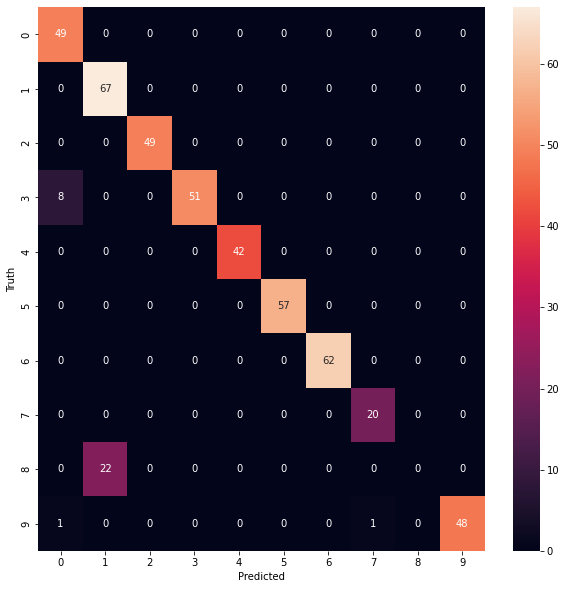

In [33]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')